<a href="https://colab.research.google.com/github/sofpast/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() is True else "cpu"
device

2.1.0+cu118


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
# camera apps, modern cars, and manufacturers

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [5]:
# Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [6]:
# Two of main to fix overfitting include:
# 1. Using a smaller or different model
# 2. Using a larger dataset

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [7]:
import torch.nn as nn
m = nn.Softmax(dim=1)
input = torch.randn(1, 4)
print(input)

tensor([[0.5161, 1.7055, 0.9420, 0.9916]])


In [8]:
output = m(input)
output

tensor([[0.1347, 0.4424, 0.2062, 0.2167]])

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [9]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(f"PyTorch version: {torch.__version__}\ntorchvision: {torchvision.__version__}")


PyTorch version: 2.1.0+cu118
torchvision: 0.16.0+cu118


In [10]:
# Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 19193016.23it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 301490.18it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5567516.18it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6070361.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [11]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [12]:
print(image.shape)
print(len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets))
class_names = train_data.classes
print(class_names)

torch.Size([1, 28, 28])
60000 60000 10000 10000
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## 6. Visualize at least 5 different samples of the MNIST training dataset.

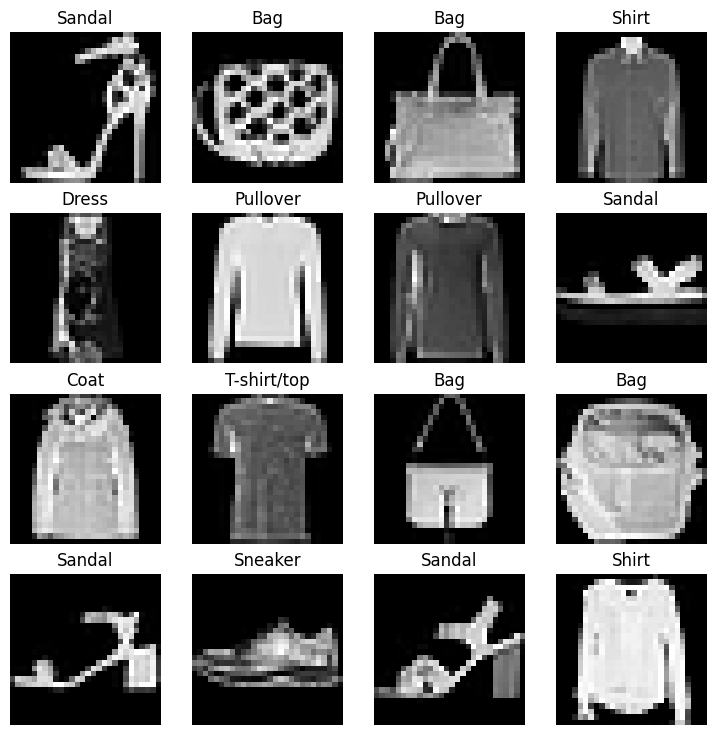

In [13]:
# Plot image
torch.manual_seed(23)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c3318e5f1c0>, <torch.utils.data.dataloader.DataLoader object at 0x7c3318e5eb00>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [26]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2
        )
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,
            out_features=output_shape
        )
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2




FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [27]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# Import accuracy metric
from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download


In [29]:
# train_step
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)
                              )
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.5f} %")



In [30]:
# training model

torch.manual_seed(42)

from timeit import default_timer as timer
from tqdm import tqdm
start_time = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(data_loader=train_dataloader,
            model=model_2,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn
             )
  test_step(
      data_loader=test_dataloader,
      model=model_2,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

end_time = timer()

print(f"Training time: {end_time - start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 0.59518 | Train accuracy: 78.37500%
Test loss: 0.00157 | Test Accuracy: 0.25958 %
Test loss: 0.00154 | Test Accuracy: 0.25043 %
Test loss: 0.00117 | Test Accuracy: 0.28035 %
Test loss: 0.00061 | Test Accuracy: 0.32038 %
Test loss: 0.00131 | Test Accuracy: 0.28058 %
Test loss: 0.00057 | Test Accuracy: 0.30042 %
Test loss: 0.00069 | Test Accuracy: 0.31046 %
Test loss: 0.00142 | Test Accuracy: 0.24061 %
Test loss: 0.00068 | Test Accuracy: 0.32026 %
Test loss: 0.00095 | Test Accuracy: 0.27059 %
Test loss: 0.00112 | Test Accuracy: 0.27043 %
Test loss: 0.00115 | Test Accuracy: 0.27043 %
Test loss: 0.00139 | Test Accuracy: 0.27043 %
Test loss: 0.00083 | Test Accuracy: 0.29040 %
Test loss: 0.00165 | Test Accuracy: 0.26051 %
Test loss: 0.00089 | Test Accuracy: 0.30035 %
Test loss: 0.00078 | Test Accuracy: 0.30048 %
Test loss: 0.00160 | Test Accuracy: 0.23059 %
Test loss: 0.00111 | Test Accuracy: 0.28029 %
Test loss: 0.00192 | Test Accuracy: 0.25050 %
Test loss:

 20%|██        | 1/5 [00:57<03:49, 57.49s/it]

Test loss: 0.00124 | Test Accuracy: 0.28045 %
Test loss: 0.00166 | Test Accuracy: 0.24051 %
Test loss: 0.00108 | Test Accuracy: 0.30029 %
Epoch: 1
------------
Train loss: 0.36536 | Train accuracy: 86.90167%
Test loss: 0.00157 | Test Accuracy: 0.27955 %
Test loss: 0.00114 | Test Accuracy: 0.27046 %
Test loss: 0.00109 | Test Accuracy: 0.29040 %
Test loss: 0.00065 | Test Accuracy: 0.29046 %
Test loss: 0.00139 | Test Accuracy: 0.28048 %
Test loss: 0.00043 | Test Accuracy: 0.30042 %
Test loss: 0.00073 | Test Accuracy: 0.30048 %
Test loss: 0.00135 | Test Accuracy: 0.25056 %
Test loss: 0.00046 | Test Accuracy: 0.32029 %
Test loss: 0.00094 | Test Accuracy: 0.27059 %
Test loss: 0.00092 | Test Accuracy: 0.29040 %
Test loss: 0.00116 | Test Accuracy: 0.27050 %
Test loss: 0.00114 | Test Accuracy: 0.28042 %
Test loss: 0.00086 | Test Accuracy: 0.29043 %
Test loss: 0.00145 | Test Accuracy: 0.27050 %
Test loss: 0.00099 | Test Accuracy: 0.27043 %
Test loss: 0.00076 | Test Accuracy: 0.30038 %
Test loss:

 40%|████      | 2/5 [01:53<02:50, 56.82s/it]

Test loss: 0.00053 | Test Accuracy: 0.30048 %
Test loss: 0.00123 | Test Accuracy: 0.29050 %
Test loss: 0.00069 | Test Accuracy: 0.30045 %
Test loss: 0.00129 | Test Accuracy: 0.29050 %
Test loss: 0.00163 | Test Accuracy: 0.25053 %
Test loss: 0.00073 | Test Accuracy: 0.28035 %
Epoch: 2
------------
Train loss: 0.32588 | Train accuracy: 88.12833%
Test loss: 0.00154 | Test Accuracy: 0.27955 %
Test loss: 0.00101 | Test Accuracy: 0.27046 %
Test loss: 0.00081 | Test Accuracy: 0.29040 %
Test loss: 0.00069 | Test Accuracy: 0.30045 %
Test loss: 0.00120 | Test Accuracy: 0.28051 %
Test loss: 0.00046 | Test Accuracy: 0.31040 %
Test loss: 0.00079 | Test Accuracy: 0.29053 %
Test loss: 0.00133 | Test Accuracy: 0.25053 %
Test loss: 0.00056 | Test Accuracy: 0.32029 %
Test loss: 0.00105 | Test Accuracy: 0.27059 %
Test loss: 0.00087 | Test Accuracy: 0.28042 %
Test loss: 0.00099 | Test Accuracy: 0.28045 %
Test loss: 0.00112 | Test Accuracy: 0.27046 %
Test loss: 0.00062 | Test Accuracy: 0.30038 %
Test loss:

 60%|██████    | 3/5 [02:47<01:50, 55.39s/it]

Test loss: 0.00079 | Test Accuracy: 0.29040 %
Test loss: 0.00123 | Test Accuracy: 0.28048 %
Test loss: 0.00147 | Test Accuracy: 0.29043 %
Test loss: 0.00084 | Test Accuracy: 0.28048 %
Test loss: 0.00103 | Test Accuracy: 0.28045 %
Test loss: 0.00106 | Test Accuracy: 0.25050 %
Test loss: 0.00073 | Test Accuracy: 0.30032 %
Test loss: 0.00074 | Test Accuracy: 0.29050 %
Test loss: 0.00066 | Test Accuracy: 0.31043 %
Test loss: 0.00049 | Test Accuracy: 0.31050 %
Test loss: 0.00065 | Test Accuracy: 0.28054 %
Test loss: 0.00109 | Test Accuracy: 0.29043 %
Test loss: 0.00067 | Test Accuracy: 0.30045 %
Test loss: 0.00096 | Test Accuracy: 0.29050 %
Test loss: 0.00162 | Test Accuracy: 0.24054 %
Test loss: 0.00068 | Test Accuracy: 0.32026 %
Epoch: 3
------------
Train loss: 0.30489 | Train accuracy: 88.91667%
Test loss: 0.00147 | Test Accuracy: 0.27955 %
Test loss: 0.00119 | Test Accuracy: 0.26048 %
Test loss: 0.00081 | Test Accuracy: 0.29037 %
Test loss: 0.00046 | Test Accuracy: 0.30045 %
Test loss:

 80%|████████  | 4/5 [03:41<00:54, 54.68s/it]

Test loss: 0.00148 | Test Accuracy: 0.27034 %
Test loss: 0.00073 | Test Accuracy: 0.29040 %
Test loss: 0.00094 | Test Accuracy: 0.28048 %
Test loss: 0.00104 | Test Accuracy: 0.26048 %
Test loss: 0.00085 | Test Accuracy: 0.29037 %
Test loss: 0.00089 | Test Accuracy: 0.29046 %
Test loss: 0.00048 | Test Accuracy: 0.30045 %
Test loss: 0.00061 | Test Accuracy: 0.29050 %
Test loss: 0.00052 | Test Accuracy: 0.30045 %
Test loss: 0.00108 | Test Accuracy: 0.30048 %
Test loss: 0.00055 | Test Accuracy: 0.30048 %
Test loss: 0.00098 | Test Accuracy: 0.29050 %
Test loss: 0.00148 | Test Accuracy: 0.27050 %
Test loss: 0.00081 | Test Accuracy: 0.28042 %
Epoch: 4
------------
Train loss: 0.28981 | Train accuracy: 89.56333%
Test loss: 0.00215 | Test Accuracy: 0.26957 %
Test loss: 0.00124 | Test Accuracy: 0.27043 %
Test loss: 0.00065 | Test Accuracy: 0.31037 %
Test loss: 0.00030 | Test Accuracy: 0.31050 %
Test loss: 0.00118 | Test Accuracy: 0.30051 %
Test loss: 0.00063 | Test Accuracy: 0.30048 %
Test loss:

100%|██████████| 5/5 [04:36<00:00, 55.21s/it]

Test loss: 0.00071 | Test Accuracy: 0.30051 %
Test loss: 0.00049 | Test Accuracy: 0.31046 %
Test loss: 0.00143 | Test Accuracy: 0.28054 %
Test loss: 0.00187 | Test Accuracy: 0.24051 %
Test loss: 0.00075 | Test Accuracy: 0.30029 %
Training time: 276.0380973749998


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [31]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
  pred_probs = []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [32]:
# take 5 random samples
import random
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

In [50]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [33]:
# make prediction on test samples
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs

tensor([[6.8010e-08, 2.0706e-08, 4.1742e-08, 2.4429e-07, 1.8432e-08, 9.9965e-01,
         3.7651e-07, 5.5896e-06, 7.8178e-06, 3.3204e-04],
        [9.3477e-03, 9.3081e-01, 1.2146e-04, 1.7831e-02, 7.3880e-03, 1.1622e-05,
         3.4349e-02, 3.5850e-05, 7.3912e-05, 3.2998e-05],
        [4.1737e-06, 1.4108e-08, 1.9413e-06, 1.3117e-07, 7.4271e-07, 2.1486e-05,
         9.7333e-07, 9.6709e-01, 9.3385e-05, 3.2784e-02],
        [7.2867e-04, 5.0717e-05, 3.9856e-01, 7.3177e-04, 5.9845e-01, 1.0009e-07,
         1.4182e-03, 4.6329e-06, 5.3605e-05, 2.1164e-06],
        [1.2950e-01, 4.6162e-06, 1.6781e-04, 7.0084e-01, 5.7223e-04, 2.3614e-07,
         1.6872e-01, 1.5630e-05, 1.8047e-04, 2.2641e-06]])

In [34]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3])

In [35]:
test_labels, pred_classes

([5, 1, 7, 4, 3], tensor([5, 1, 7, 4, 3]))

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

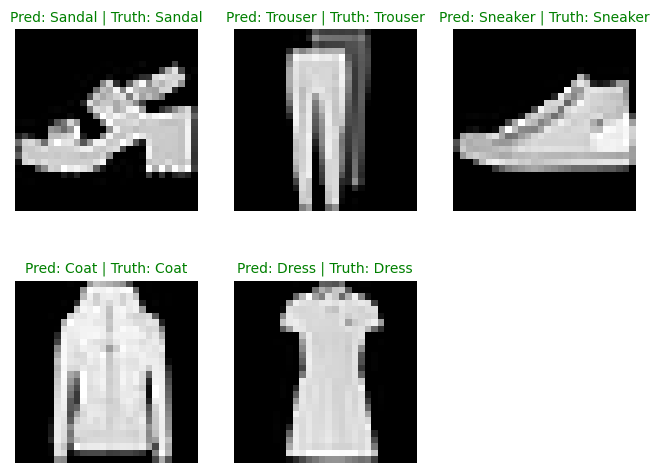

In [42]:
# Plot prediction
plt.figure(figsize=(8, 6))

nrows = 2
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [45]:
input = torch.randn([1, 3, 64, 64])
input

tensor([[[[-2.3169, -0.2168, -1.3847,  ...,  0.6039, -1.7223, -0.8278],
          [-0.4976,  0.4747, -2.5095,  ...,  1.6048, -2.4801, -0.4175],
          [-0.1933,  0.6526, -1.9006,  ...,  1.5080,  0.3094, -0.5003],
          ...,
          [ 1.3945,  1.1369,  1.1797,  ...,  0.3114, -0.5756,  0.3273],
          [ 0.5520, -0.7733, -2.4740,  ..., -1.5076, -0.4230, -0.4520],
          [-1.5838,  0.8040,  0.4396,  ..., -1.4912,  0.5385,  1.3362]],

         [[ 0.3451, -0.1033,  0.4315,  ...,  0.9802, -0.0586,  2.0731],
          [-1.8001,  1.4671, -0.1637,  ..., -1.5173,  0.2003, -0.2469],
          [ 0.1620,  0.3937, -0.5063,  ...,  0.6884,  1.6444, -0.0973],
          ...,
          [ 0.8699, -0.7617, -0.5187,  ...,  0.3781, -0.5251,  1.1868],
          [-0.9007, -0.5312,  0.0827,  ..., -0.3169, -1.6129, -0.9479],
          [-0.0292,  1.7699,  0.7444,  ...,  0.1274,  0.3783,  1.7934]],

         [[-0.0848,  1.2047,  0.7305,  ...,  0.4399,  0.6742, -0.5764],
          [ 1.7595,  1.9139, -

In [58]:
m = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=10, stride=1)

In [59]:
output = m(input)
output.shape
output

tensor([[[[ 0.8343,  0.2159, -0.2763,  ...,  0.0660,  0.3062, -0.0227],
          [-0.1125,  0.6037, -0.3642,  ...,  0.2733,  0.2862, -0.6017],
          [ 0.2606, -0.7561, -0.8991,  ...,  0.2023, -0.2530,  0.2173],
          ...,
          [ 0.6015, -0.0839,  0.7101,  ..., -1.1608,  0.9696, -0.8531],
          [-1.0790, -0.0962,  0.4749,  ...,  0.1461,  1.2514,  1.1650],
          [-1.1696,  0.2275,  0.6774,  ..., -0.1094, -0.6386, -0.2735]],

         [[ 0.4587,  1.1530,  0.0773,  ..., -0.0762,  0.5922, -0.7471],
          [ 0.1288,  0.7747,  0.2449,  ...,  0.4672, -0.2786, -1.1536],
          [ 0.7579,  0.5571,  0.5803,  ..., -0.6714, -0.5804,  0.2090],
          ...,
          [-0.8777, -0.2194,  0.3578,  ..., -0.6963, -0.0453,  0.2534],
          [-0.7817,  0.4457,  0.6199,  ...,  0.0810, -0.0920, -0.2516],
          [ 0.0493, -0.4959, -1.3279,  ...,  0.2979, -0.2346, -1.0937]],

         [[-0.6399, -0.5582,  0.4670,  ..., -0.0593,  0.2055,  1.0792],
          [-0.7946, -0.3009,  

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?